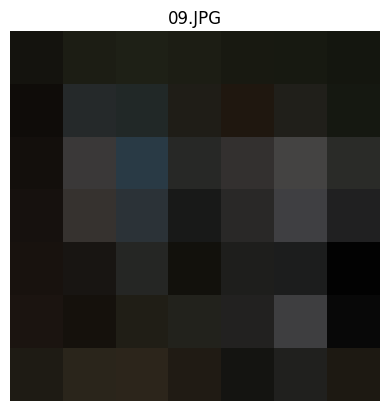

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # Convert from BGR to RGB for display
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def simulate_physical_sensor(image, pixel_size, pixel_pitch, sensor_size):
    # Calculate effective resolution based on sensor properties
    original_height, original_width = image.shape[:2]
    
    # Effective resolution
    effective_width = int(sensor_size[0] / (pixel_size + pixel_pitch))
    effective_height = int(sensor_size[1] / (pixel_size + pixel_pitch))
    
    # Downscale image to effective resolution
    downscaled_image = cv2.resize(image, (effective_width, effective_height), interpolation=cv2.INTER_AREA)
    
    # Upscale back to original size for visualization
    simulated_image = cv2.resize(downscaled_image, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    
    return downscaled_image

def display_image(image, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '09.JPG'
image = load_image(image_path)

# Simulate with specific pixel size, pitch, and sensor size
pixel_size =  3000 # in micrometers
pixel_pitch = 5000 # in micrometers
sensor_size = (60000, 60000)  # in micrometers (width, height)

simulated_image = simulate_physical_sensor(image, pixel_size, pixel_pitch, sensor_size)

display_image(simulated_image, "09.JPG")

simulated_image
simulated_image_gray =cv2.cvtColor(simulated_image, cv2.COLOR_BGR2GRAY)


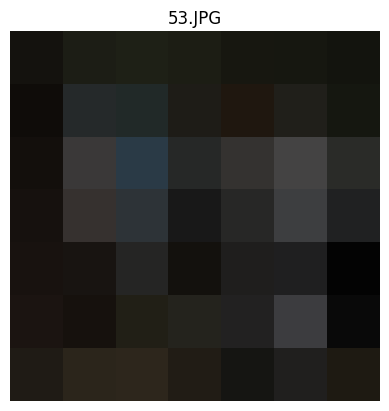

array([[ 1,  0,  0,  0,  1,  1,  2],
       [ 0,  0, -1,  0,  0,  0,  1],
       [ 0,  0, -1,  0, -2,  0,  0],
       [ 0,  1, -1,  1,  1,  2, -1],
       [-1,  0,  0,  0, -1, -2, -1],
       [ 0,  0, -1, -1,  0,  2, -1],
       [-1,  0, -1, -1, -1,  0, -1]], dtype=int32)

In [13]:
image_path1 = '53.JPG'
image = load_image(image_path1)

# Simulate with specific pixel size, pitch, and sensor size
pixel_size =  3000 # in micrometers
pixel_pitch = 5000 # in micrometers
sensor_size = (60000, 60000)  # in micrometers (width, height)

simulated_image1 = simulate_physical_sensor(image, pixel_size, pixel_pitch, sensor_size)

display_image(simulated_image1, "53.JPG")

simulated_image_gray1 =cv2.cvtColor(simulated_image1, cv2.COLOR_BGR2GRAY)
simulated_image_gray.astype(np.int32)- simulated_image_gray1.astype(np.int32)


How INTER_AREA Works
Pixel Area Relation: When shrinking an image, INTER_AREA calculates the average of multiple pixels from the original image to determine the value of a single pixel in the resized image. Essentially, it considers the contribution of each pixel in the area that maps to a pixel in the downscaled image.
Averaging Pixels: For example, if you're reducing the size of an image by half, INTER_AREA might average groups of 2x2 pixels from the original image to produce a single pixel in the resized image. This process helps in preserving more of the image's detail and reducing aliasing or moiré patterns, which can occur when downscaling images.



In [4]:
effective_width = int(sensor_size[0] / (pixel_size + pixel_pitch))
effective_width

28